#### Instructions: Additional information is wanted about the temperature trends befpre opening a surf shop. The task is to provide temperature data for the month of JUNE and DECEMBER in Oahu, HI to determine whether the surf and ice cream business is sustainable year-round.

- Deliverable 1: Determine the summary statistics for JUNE
- Deliverable 2:Determine the summary statistics for DECEMBER
- Deliverable 3: a written report for the statistical analysis (README.md)

In [1]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Import dataframe images when needed:
import dataframe_image as dfi

In [11]:
engine = create_engine("sqlite:///hawaii-copy1.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()
# # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [13]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
# june_temps

In [14]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
# june_temps_list

In [15]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [16]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame. # I will achieve this using the .describe() method.
june_temps_df.describe()
june_temp_stats= june_temps_df.describe()

# Export this image to the images folder for my README:
dfi.export(june_temp_stats, "Images/june_temp_stats_summary.tiff")
june_temp_stats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


### Exploritory Analysis of June Weather:

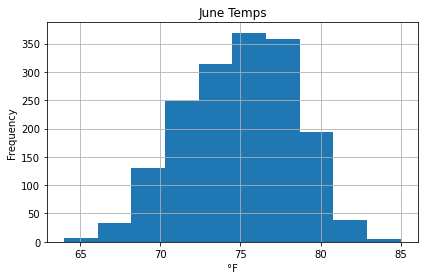

In [31]:
# Histogram Plot:
june_temps_df.hist()
plt.ylabel('Frequency')
plt.xlabel('°F')
plt.tight_layout()
plt.savefig('Images/june_temps_hist')
plt.show()


## D2: Determine the Summary Statistics for December

In [25]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
# dec_temps

In [26]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
# dec_temps_list

In [27]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


### Exploritory Analysis of December weather:

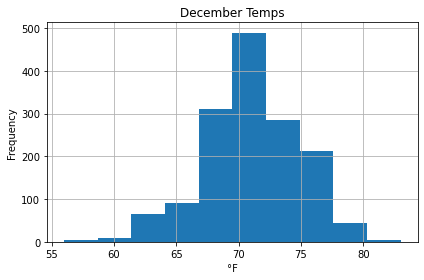

In [32]:
dec_temps_df.hist()
plt.ylabel('Frequency')
plt.xlabel('°F')
plt.tight_layout()
plt.savefig('Images/dec_temps_hist')
plt.show()

In [ ]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()
dec_temp_stats= dec_temps_df.describe()
dec_temp_stats

In [ ]:
# Export DataFrame as PNG to Images folder for README:

dfi.export(dec_temp_stats,"Images/dec_temp_stats_summary.tiff")